In [1]:
# R.Shirley Pauline - 225229135
# Lab11 - Shopping Mall Customer Segmentation using Clustering

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.shape

(200, 5)

In [5]:
customer_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
customer_data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
customer_data.value_counts()

CustomerID  Genre   Age  Annual Income (k$)  Spending Score (1-100)
1           Male    19   15                  39                        1
138         Male    32   73                  73                        1
128         Male    40   71                  95                        1
129         Male    59   71                  11                        1
130         Male    38   71                  75                        1
                                                                      ..
70          Female  32   48                  47                        1
71          Male    70   49                  55                        1
72          Female  47   49                  42                        1
73          Female  60   50                  49                        1
200         Male    30   137                 83                        1
Length: 200, dtype: int64

#### Step2 [Label encode gender]

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
customer_data['Genre'] = label_encoder.fit_transform(customer_data['Genre']) 
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


#### Step3 [Check for variance]

In [10]:
customer_data.describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [11]:
customer_data.var()

CustomerID                3350.000000
Genre                        0.247638
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

In [12]:
customer_data.corr()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Genre,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


#### Step4 [Check skewness]

In [13]:
customer_data.skew()

CustomerID                0.000000
Genre                     0.243578
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [14]:
customer_data.sort_values(by =['Genre','Age','Annual Income (k$)','Spending Score (1-100)'])

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
114,115,0,18,65,48
111,112,0,19,63,54
115,116,0,19,65,50
2,3,0,20,16,6
39,40,0,20,37,75
...,...,...,...,...,...
102,103,1,67,62,59
108,109,1,68,63,43
57,58,1,69,44,46
60,61,1,70,46,56


#### Step5 [Pair plot]

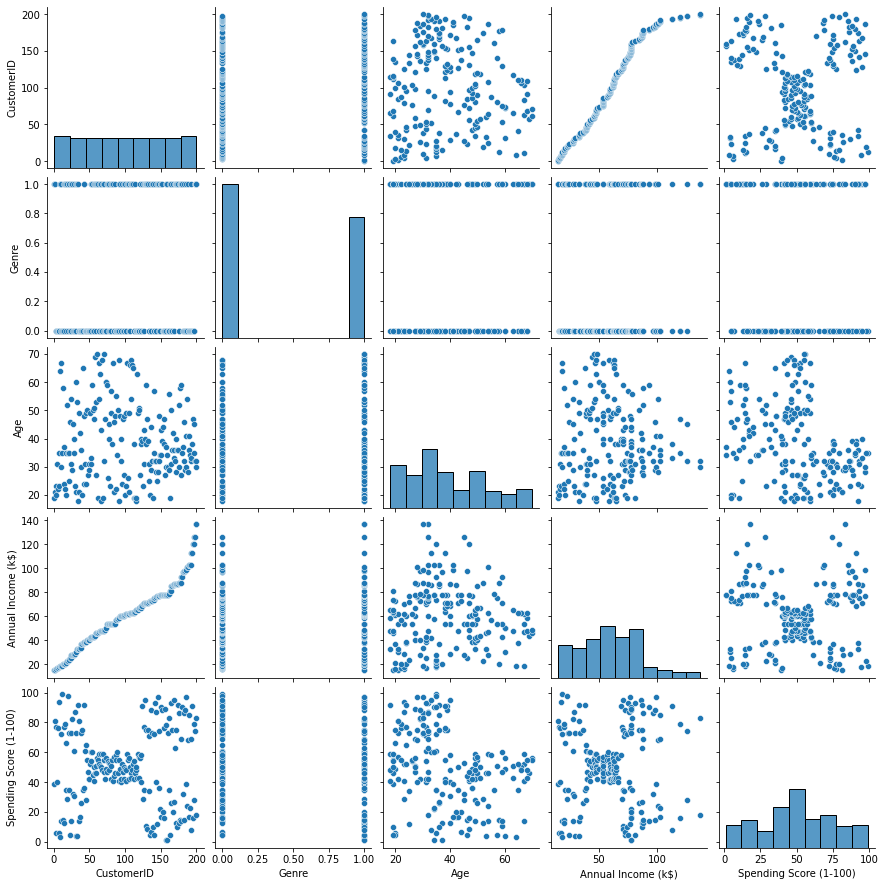

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data=customer_data)

#### Step6 [Build KMeans]

In [16]:
from sklearn.cluster import KMeans

In [17]:
customer_data.drop(['CustomerID'],axis=1, inplace=True)

In [18]:
KM = KMeans(n_clusters=5)
KM.fit(customer_data)

KMeans(n_clusters=5)

In [19]:
KM.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [20]:
print(KM.cluster_centers_)

[[ 0.52777778 40.66666667 87.75       17.58333333]
 [ 0.4125     42.9375     55.0875     49.7125    ]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.39130435 45.2173913  26.30434783 20.91304348]
 [ 0.40909091 25.27272727 25.72727273 79.36363636]]


#### Step7 [Scatter Plot]

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

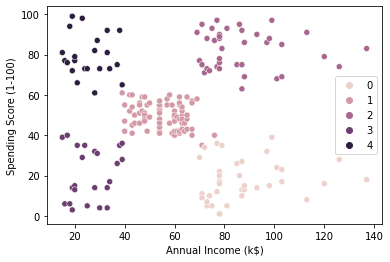

In [21]:
sns.scatterplot(customer_data['Annual Income (k$)'], customer_data['Spending Score (1-100)'], hue=KM.labels_)

#### Step8 [Cluster Analysis]

In [22]:
kmeans2 = KMeans(n_clusters = 5, init='k-means++')
kmeans2.fit(customer_data)
pred = kmeans2.predict(customer_data)

In [23]:
frame = pd.DataFrame(customer_data)
frame['cluster'] = pred

In [24]:
frame.cluster.value_counts()

1    79
3    39
2    37
0    23
4    22
Name: cluster, dtype: int64

In [25]:
frame

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,3
196,0,45,126,28,2
197,1,32,126,74,3
198,1,32,137,18,2


In [26]:
C0 = customer_data[customer_data['cluster'] == 0]
C1 = customer_data[customer_data['cluster'] == 1]
C2 = customer_data[customer_data['cluster'] == 2]
C3 = customer_data[customer_data['cluster'] == 3]
C4 = customer_data[customer_data['cluster'] == 4]

In [27]:
import statistics as ss
print('Average Age : ',C0['Age'].mean())
print('Average Annual Income : ',C0['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C0['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C0.shape)
print('From those Customers We have',C0.Genre.value_counts()[1],'males and',C0.Genre.value_counts()[0],'females')

Average Age :  45.21739130434783
Average Annual Income :  26.304347826086957
Deviation of the mean for annual Income :  7.893811054517766
No. of Customers ie shape : (23, 5)
From those Customers We have 9 males and 14 females


In [28]:
print('Average Age : ',C1['Age'].mean())
print('Average Annual Income : ',C1['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C1['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C1.shape)
print('From those Customers We have',C1.Genre.value_counts()[1],'males and',C1.Genre.value_counts()[0],'females')

Average Age :  43.12658227848101
Average Annual Income :  54.822784810126585
Deviation of the mean for annual Income :  8.576592314850398
No. of Customers ie shape : (79, 5)
From those Customers We have 33 males and 46 females


In [29]:
print('Average Age : ',C2['Age'].mean())
print('Average Annual Income : ',C2['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C2['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C2.shape)
print('From those Customers We have',C2.Genre.value_counts()[1],'males and',C2.Genre.value_counts()[0],'females')

Average Age :  40.32432432432432
Average Annual Income :  87.43243243243244
Deviation of the mean for annual Income :  16.2729163891359
No. of Customers ie shape : (37, 5)
From those Customers We have 19 males and 18 females


In [30]:
print('Average Age : ',C3['Age'].mean())
print('Average Annual Income : ',C3['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C3['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C3.shape)
print('From those Customers We have',C3.Genre.value_counts()[1],'males and',C3.Genre.value_counts()[0],'females')

Average Age :  32.69230769230769
Average Annual Income :  86.53846153846153
Deviation of the mean for annual Income :  16.312484972924967
No. of Customers ie shape : (39, 5)
From those Customers We have 18 males and 21 females


In [31]:
print('Average Age : ',C4['Age'].mean())
print('Average Annual Income : ',C4['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C4['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C4.shape)
print('From those Customers We have',C4.Genre.value_counts()[1],'males and',C4.Genre.value_counts()[0],'females')

Average Age :  25.272727272727273
Average Annual Income :  25.727272727272727
Deviation of the mean for annual Income :  7.566730552584204
No. of Customers ie shape : (22, 5)
From those Customers We have 9 males and 13 females


#### Step9 [Find the best number of clusters]

In [32]:
SSE = []
for clust in range(1,20):
  KM = KMeans(n_clusters= clust, init='k-means++')
  KM = KM.fit(customer_data)
  SSE.append(KM.inertia_)

Text(0, 0.5, 'Inertia')

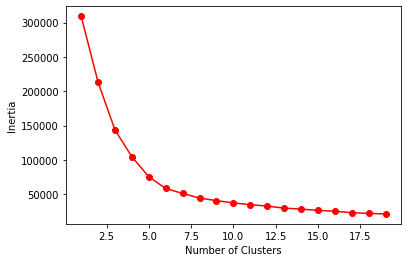

In [33]:
plt.plot(np.arange(1,20), SSE,'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

#### Step10 [Reduce Dimensions using PCA]

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=2)
_PCA = pca.fit_transform(customer_data)
PCA_Components = pd.DataFrame(_PCA)

In [36]:
PCA_Components

,0,1
0,-31.534390,-33.349296
1,1.470393,-56.847684
2,-57.281081,-13.768454
3,-1.498970,-53.517338
4,-31.869456,-30.739696
...,...,...
195,58.010363,31.673893
196,19.158738,66.666049
197,58.097007,39.003394
198,20.086571,79.606665


In [37]:
KM1 = KMeans(n_clusters=5)
KM1.fit(PCA_Components)
KM1.cluster_centers_

array([[-44.30512124, -10.54356817],
       [-10.68652483,  42.20770277],
       [ 41.54479999,   2.33729767],
       [ -4.3966484 ,  -3.14441008],
       [  5.57443644, -46.63058222]])

In [38]:
KM1.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

#### Step11 [Scatter plot]

<AxesSubplot:xlabel='0', ylabel='1'>

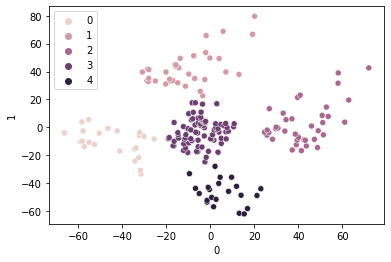

In [39]:
sns.scatterplot(PCA_Components[0], PCA_Components[1], hue=KM1.labels_)

#### Step12 [MeanShift clustering]

In [40]:
from sklearn.cluster import MeanShift, AgglomerativeClustering

In [41]:
MS = MeanShift(bandwidth = 50)
MS.fit(PCA_Components)
MS.cluster_centers_

array([[ 0.3942943 , -4.10083949]])

<AxesSubplot:xlabel='0', ylabel='1'>

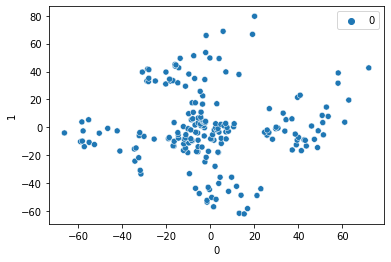

In [42]:
sns.scatterplot(PCA_Components[0], PCA_Components[1], hue=MS.labels_)

#### Step13 [Predict hierarchical clusters using AgglomerativeClustering]

In [43]:
AC = AgglomerativeClustering(n_clusters = 5, linkage='ward',compute_full_tree=True)
AC.fit(customer_data)

AgglomerativeClustering(compute_full_tree=True, n_clusters=5)

In [44]:
AC.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [45]:
customer_data['Cluster'] = AC.labels_

In [46]:
import scipy.cluster.hierarchy as sch

In [47]:
from scipy.cluster import hierarchy

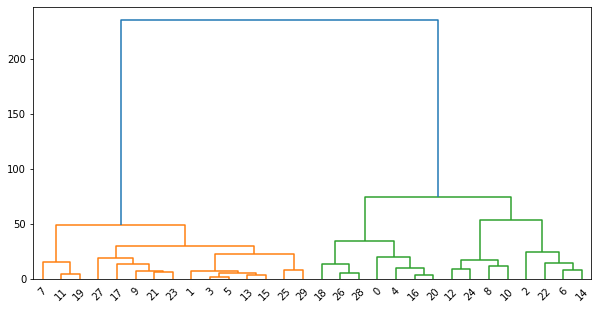

In [48]:
Z = hierarchy.linkage(customer_data[:30], 'ward')
plt.figure(figsize=(10,5))
dn = hierarchy.dendrogram(Z)

#### Step14 [Visualize scatter plot with hue as agglomerativeclustering labels_]

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

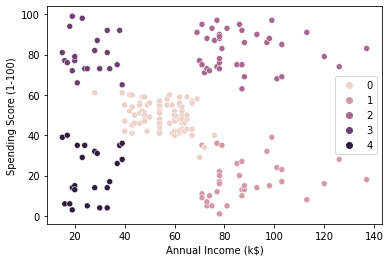

In [49]:
sns.scatterplot(customer_data['Annual Income (k$)'], customer_data['Spending Score (1-100)'], hue=AC.labels_)